# Packages for cool visualisations

In [4]:
import pandas as pd
import numpy as np

import pygwalker as pyg
from ipywidgets import interact

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("coffee-bean-production.csv")

In [32]:
df.columns.tolist()

['Entity', 'Year', 'Coffee production, tonnes']

### `matplotlib`

In [53]:
selected_countries = ['Brazil', 'India', 'China', 'Jamaica', 'United States', 'Sri Lanka', 'Ethiopia', 'Vietnam']
mask = df['Entity'].isin(selected_countries)

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
font = {'family' : 'sans-serif',
        'size'   : 20}

matplotlib.rc('font', **font)

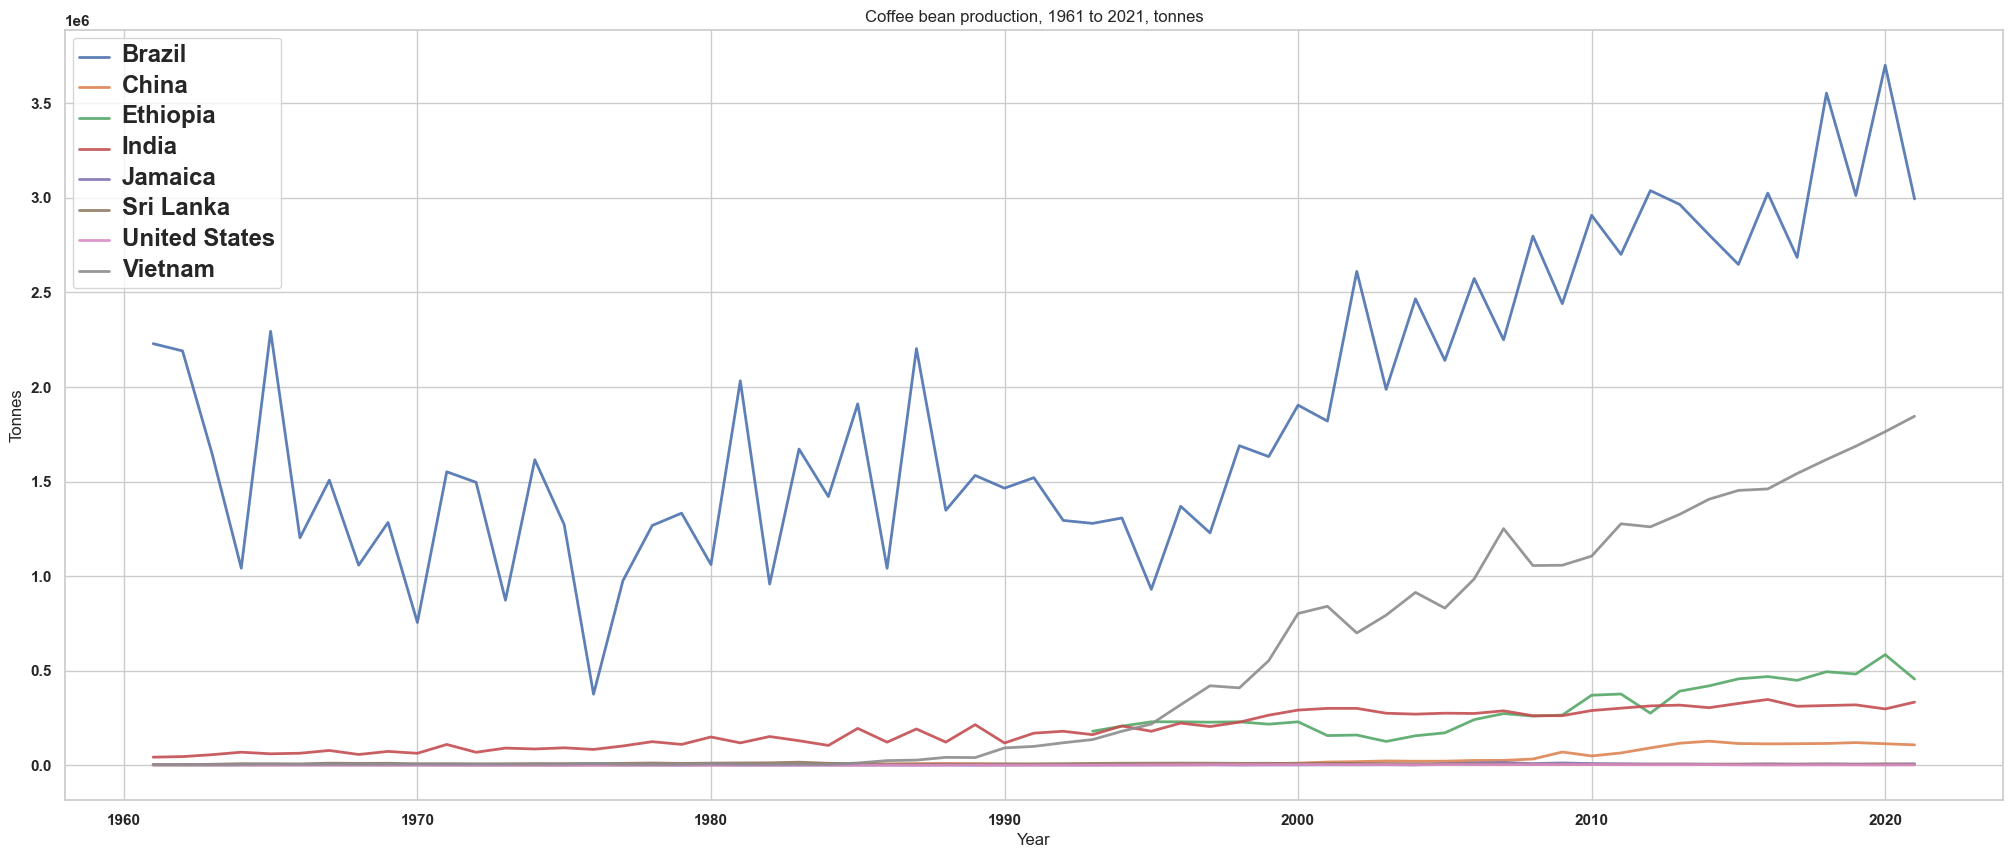

In [54]:
df_by_entity = df[mask].groupby(['Year','Entity']).first()['Coffee production, tonnes'].unstack()
df_by_entity.plot(figsize=(25, 10), alpha=0.9, linewidth=2)
plt.title('Coffee bean production, 1961 to 2021, tonnes')
plt.xlabel('Year')
plt.ylabel('Tonnes')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')

plt.show()

### `seaborn`

<Axes: xlabel='Year', ylabel='Coffee production, tonnes'>

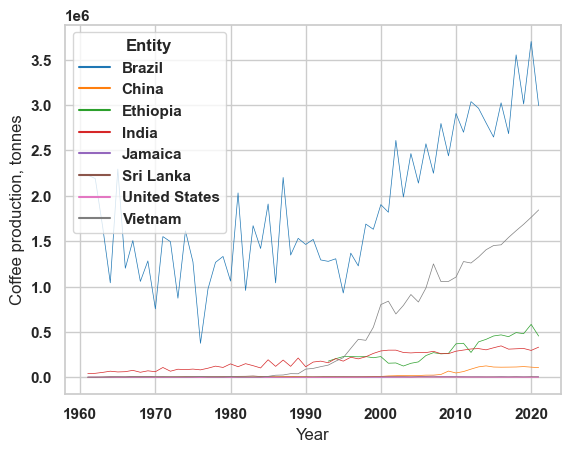

In [55]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.lineplot(data=df[mask], 
             x="Year", 
             y="Coffee production, tonnes", 
             hue="Entity",
             palette="tab10", 
             linewidth=0.5)

###  `plotly`

In [56]:
fig = px.line(df[mask],
              x="Year", 
              y="Coffee production, tonnes", 
              color='Entity',
              title='Coffee bean production, 1961 to 2021, tonnes',
             )
fig.show()